# **Off-the-Rails**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from google.colab import drive

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Apr 24 01:16:10 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# Mount the Drive
path=[]
LOCAL = False
if LOCAL:
    path = './content/'
else:    
    drive.mount('/content/drive')
    path='/content/drive/MyDrive/Colab Notebooks/content/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df0 = pd.read_csv(f'{path}/Surveydata_train_(2).csv')
df1 = pd.read_csv(f'{path}/Traveldata_train_(2).csv')

In [5]:
def report_unquie(df):
    for col in list(df.columns):
        print(f'{col}: {len(df[col].unique())} (Missing: {df[col].isnull().sum()})')
        if (len(df[col].unique()) <=7):
            print(f'\t{df[col].unique()}')

In [6]:
def get_cats(df):
  cats = []
  for col in list(df.columns):
    if (len(df[col].unique()) <=7):
      cats.append(col)
  return cats # meow

In [7]:
#report_unquie(df1)
nn = df0.loc[df0.isnull().any(axis=1)]
#report_unquie(nn)
sn = nn.Overall_Experience.sum()
p = df0.Overall_Experience.sum()
n = df0.shape[0] - df0.Overall_Experience.sum()
#print(p-n,p,n, sn)
#df0[df1.Age < 18]
#report_unquie(df0)
get_cats(df0), get_cats(df1)

df = pd.merge(df0,df1)

# pet the cat
love_cats = get_cats(df)

for cat in love_cats:
  df = pd.concat([df,pd.get_dummies(df[cat], prefix=cat, dummy_na=True)],axis=1)
  df.drop([cat],axis=1, inplace=True)


In [8]:
#df.loc[df.isnull().any(axis=1)]

In [46]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
def imputer(df, prediction=False):
  mydict = {'Extremely Poor':-3, 'Poor':-2, 'Needs Improvement':-1, 'Acceptable':0, 'Good':1, 'Excellent':2,
         'Very Inconvenient':-2, 'Inconvenient':-2, 'Needs Improvement':-1, 'Manageable':0, 'Convenient':1,'Very Convenient':2,
         'Loyal Customer':1, 'Disloyal Customer':-1, 'Normal Customer':0,
         'Personal Travel':0, 'Business Travel':1,
          'Green Car':1, 'Ordinary':0,
          'Female':0, 'Male':1,
          'Business':1, 'Eco':0
         }

  #impute and convert

  # this items do not appear in the test dataset
  df.CheckIn_Service.replace('Extremely Poor', 'Poor', inplace=True)
  df.Cleanliness.replace('Extremely Poor', 'Poor', inplace=True)
  df.Online_Support.replace('Extremely Poor', 'Poor', inplace=True)
  df.Platform_Location.replace('Very Inconvenient', 'Inconvenient', inplace=True)
  df.Onboard_Service.replace('Extremely Poor', 'Poor', inplace=True)

  # these are important for positive Overall_Experience
  df.Gender.fillna('Male', inplace=True)
  df.Travel_Class.fillna('Eco', inplace=True)
  df.Customer_Type.fillna('Loyal Customer', inplace=True)
  

  love_cats = get_cats(df)
  if prediction == False:
    love_cats.remove('Overall_Experience')

  for cat in love_cats:
    df = pd.concat([df,pd.get_dummies(df[cat], prefix=cat, dummy_na=True)],axis=1)
    df.drop([cat],axis=1, inplace=True)

  df.Age.fillna(df.Age.mean(), inplace=True)


  '''
  df.Seat_Comfort.fillna('Acceptable', inplace=True)
  df.Arrival_Time_Convenient.fillna('Good', inplace=True) # X
  df.Catering.fillna('Acceptable', inplace=True)
  df.Legroom.fillna('Good', inplace=True)
  df.Platform_Location.fillna('Manageable', inplace=True)
  df.Onboard_Wifi_Service.fillna('Good', inplace=True) # X
  df.Onboard_Entertainment.fillna('Good', inplace=True) # X
  df.Online_Support.fillna('Good', inplace=True) #X 
  df.Ease_of_Online_Booking.fillna('Good', inplace=True) #X
  df.Onboard_Service.fillna('Good', inplace=True) #X
  df.Baggage_Handling.fillna('Good', inplace=True) #X
  df.CheckIn_Service.fillna('Good', inplace=True) #X
  df.Cleanliness.fillna('Good', inplace=True) #X
  df.Online_Boarding.fillna('Good', inplace=True) #x
  df.Gender.fillna('Female', inplace=True)
  df.Customer_Type.fillna('Loyal Customer', inplace=True) #
  df.Age.fillna(df.Age.mean(), inplace=True)
  df.Type_Travel.fillna('Business Travel', inplace=True)
  df.Travel_Class.fillna('Eco', inplace=True)
  df.Departure_Delay_in_Mins.fillna('Eco', inplace=True)
  df.Arrival_Delay_in_Mins.fillna('Eco', inplace=True)
  '''
  '''
  df.Cleanliness.replace('Extremely Poor', 'Poor', inplace=True) #XXX
  df.CheckIn_Service.replace('Extremely Poor', 'Poor', inplace=True) #XXX
  df.CheckIn_Service.replace('Poor', 'Needs Improvement', inplace=True) #XXX

  df.Onboard_Service.replace('Extremely Poor', 'Poor', inplace=True) #XXX
  df.Onboard_Service.replace('Poor', 'Needs Improvement', inplace=True) #XXX

  df.Online_Support.replace('Extremely Poor', 'Poor', inplace=True) #XXX
  '''

  #report_unquie(df)
  #display(df.info())
  
  ### Convert all too nummeric values
  #df.replace(mydict, inplace=True)


  df.Departure_Delay_in_Mins.fillna(df.Departure_Delay_in_Mins.mean(), inplace=True)
  df.Arrival_Delay_in_Mins.fillna(df.Arrival_Delay_in_Mins.mean(), inplace=True)
  df.Departure_Delay_in_Mins = np.log(df.Departure_Delay_in_Mins+0.001)
  df.Arrival_Delay_in_Mins= np.log(df.Arrival_Delay_in_Mins+0.001)

  #Travel_Distance
  #df.Travel_Distance = np.where(df.Travel_Distance >= 2538, 2538 + df.Travel_Distance/2538, df.Travel_Distance )

  # Drop
  y=[]
  if prediction == False:
    y = df.Overall_Experience.to_numpy()
  df.drop(columns=['Overall_Experience'], inplace=True, errors='ignore')

  # Scale
  scaler = MinMaxScaler(feature_range=(0,1)) 
  std_scaler = StandardScaler()
  df_scaled = df.to_numpy()

  df_scaled = scaler.fit_transform(df_scaled)
  df_scaled = pd.DataFrame(df_scaled, columns=df.columns.tolist())

  X = df_scaled.to_numpy()
  X.shape
  return X, y, df_scaled

In [10]:
#df_scaled.plot.box(vert=False)

In [11]:
def show_dist(data):
    for col in data.columns[1:]:
        print(col)

        print('Skew :', round(data[col].skew(), 2))

        plt.figure(figsize = (15, 4))
        plt.subplot(1, 2, 1)

        data[col].hist(bins = 10, grid = False)

        plt.ylabel('count')
        plt.subplot(1, 2, 2)
        sns.boxplot(x = data[col])
        plt.show()
        
#show_dist(df)

# **Split Data**

In [12]:
from sklearn.model_selection import train_test_split
df = pd.merge(df0,df1)

MULLIGAN = True

if MULLIGAN:
  df_mulligan = pd.read_csv(f'{path}/mulligan_list.csv')
  IDs = df_mulligan[df_mulligan.Q.isnull()].ID
  df = df[df.ID.isin(IDs) == False]  # False is normal mode True is inverse mode 

#assert(False)
X, y, df_scaled = imputer(df)
#df_scaled.plot.box(vert=False)
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #, random_state=42)

In [13]:
get_null = lambda x: x.loc[x.isnull().any(axis=1)]
#get_null(df_scaled)

In [14]:
# New balanced split
split_ratio = 0.2 # 20%

def balanced_sample(labels, N):
  np.random.seed(42)
  index_set_0 = set()
  index_set_1 = set()

  #N = (6*6)//2
  while ( (len(index_set_0) < N) or (len(index_set_1) < N)):
      index = int(np.random.randint(0, labels.shape[0], 1)) 
      #print(type(labels))
      if labels[index] == 0:
        if (len(index_set_0) < N):
          index_set_0.add(index)
      else:
        if (len(index_set_1) < N):
          index_set_1.add(index)

  return list(index_set_0) + list(index_set_1)

# now make a sample dataset
index_list = balanced_sample(y, (len(y)* split_ratio)//2)


x_test = []
y_test = []
for index in index_list:
  image = np.array(X[index].copy())
  x_test.append(image)
  y_test.append(y[index])

# spank it on the bottom...
# and that's how new data is borne! :D 
x_test = np.array(x_test)
y_test = np.array(y_test)

# now drop the validation indexes from the training set
y_train = np.delete(y, list(index_list),0)
x_train = np.delete(X, list(index_list),0)


#x_train, x_test, y_train, y_test 




# **Balance**

In [15]:
df1.Travel_Distance.describe()

count    94379.000000
mean      1978.888185
std       1027.961019
min         50.000000
25%       1359.000000
50%       1923.000000
75%       2538.000000
max       6951.000000
Name: Travel_Distance, dtype: float64

<BarContainer object of 2 artists>

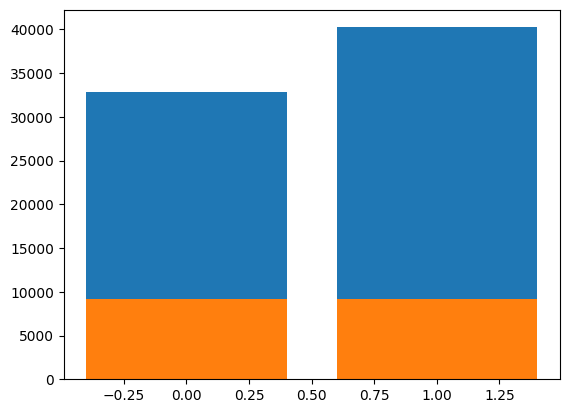

In [16]:
a,b= np.unique(y_train, return_counts=True)
plt.bar(a, b)

a,b= np.unique(y_test, return_counts=True)
plt.bar(a, b)

In [17]:
def get_droplist(labels):    
    N_max = np.unique(labels, return_counts=True)[1].min() # nope let's be general
    # now we create a drop list
    indices = [set() for i in range(10)]
    for i in range(10):
        while(np.count_nonzero((labels == i)) - len(indices[i]) > N_max):
            index = int(np.random.randint(0, labels.shape[0], 1)) # pick an index at random
            if(labels[index] == i): # add if it matched this digit
                indices[i].add(index)
    drop_list = set().union(*indices)
    return drop_list


In [18]:
# pick any N_max negative reviews, then average pairs of them

def get_augmentlist(labels):    
    N_max = np.unique(labels, return_counts=True)[1].max() - np.unique(labels, return_counts=True)[1].min() # nope let's be general
    print(N_max)
    # now we create a drop list
    indices = set()

    while(len(indices) < N_max):
        index = int(np.random.randint(0, labels.shape[0], 1)) # pick an index at random
        if(labels[index] == 0): # add if it matched this digit
            indices.add(index)
    augment_list = list(indices) 
    return augment_list

<BarContainer object of 2 artists>

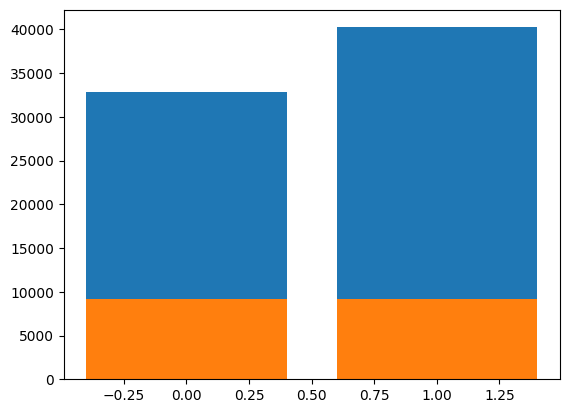

In [19]:
# Karen augmentation
# note this is just a proof of concept...
# ideally we won't augment a validation set
# Be sure to fix this!

KAREN = False
if KAREN:
  alist_train = get_augmentlist(y_train)  
  alist_test = get_augmentlist(y_test) 

  x_train = list(x_train)
  y_train = list(y_train)
  for i in alist_train:
    x_train.append((x_train[i]+x_train[(i+1)%(len(alist_train))])/2)
    y_train.append(y_train[i])
  x_train = np.array(x_train)
  y_train = np.array(y_train)

  x_test = list(x_test)
  y_test = list(y_test)
  for i in alist_test:
    x_test.append((x_test[i]+x_test[(i+1)%(len(alist_test))])/2)
    y_test.append(y_test[i])
  x_test = np.array(x_test)
  y_test = np.array(y_test)

a,b= np.unique(y_train, return_counts=True)
plt.bar(a, b)

a,b= np.unique(y_test, return_counts=True)
plt.bar(a, b)


array([0, 0, 0, ..., 1, 1, 1])

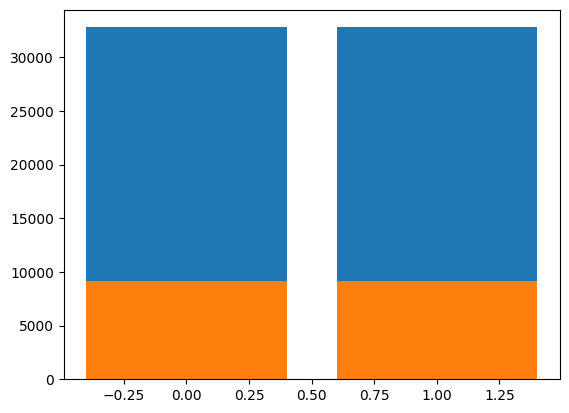

In [20]:

# Balance Training
drop_list = get_droplist(y_train)
x_train = np.delete(x_train, list(drop_list),0)
y_train = np.delete(y_train, list(drop_list),0)

a,b= np.unique(y_train, return_counts=True)
plt.bar(a, b)
y_train

# Balance Test
drop_list = get_droplist(y_test)
x_test = np.delete(x_test, list(drop_list),0)
y_test = np.delete(y_test, list(drop_list),0)

a,b= np.unique(y_test, return_counts=True)
plt.bar(a, b)
y_test


# **Cast Dataset**

In [21]:
# Model / data parameters
num_classes = 2
SIZE = x_train.shape[1]
input_shape = (SIZE, 1)

# Make sure images have shape (28, 28, 1)
#x_train = np.expand_dims(x_train, -1)
#x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train shape: (65576, 112)
65576 train samples
18254 test samples


In [22]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


# **Model**

In [51]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, ReLU, LeakyReLU
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
import gc

# Bagging
def clean_up():
  # Fixing the seed
  np.random.seed(42)

  import random
  random.seed(42)
  tf.random.set_seed(42)

  # Clean start
  backend.clear_session()
  gc.collect()

clean_up()

use_relu = True
FSIZE = 24

model = Sequential()
model.add(Input(shape = input_shape)) # let's be a bit verbose
model.add(Dense(SIZE*2))
model.add(ReLU()) if use_relu else model.add(LeakyReLU(alpha=0.2))

model.add(Dropout(0.2))

model.add(Dense(SIZE, activation = "relu"))
model.add(ReLU()) if use_relu else model.add(LeakyReLU(alpha=0.2))

model.add(Dropout(0.1))

model.add(Dense(int(np.sqrt(FSIZE)), activation = "relu"))
model.add(ReLU()) if use_relu else model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(FSIZE**2+SIZE, activation = "relu"))
model.add(ReLU()) if use_relu else model.add(LeakyReLU(alpha=0.2))

model.add(Dropout(0.4))
model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons
model.summary() 


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 112, 224)          448       
                                                                 
 re_lu (ReLU)                (None, 112, 224)          0         
                                                                 
 dropout (Dropout)           (None, 112, 224)          0         
                                                                 
 dense_1 (Dense)             (None, 112, 112)          25200     
                                                                 
 re_lu_1 (ReLU)              (None, 112, 112)          0         
                                                                 
 dropout_1 (Dropout)         (None, 112, 112)          0         
                                                                 
 dense_2 (Dense)             (None, 112, 4)            4

In [52]:

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2), ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]
#callbacks = None
batch_size = 512
epochs = 20
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, callbacks = callbacks,
                      validation_data=(x_test, y_test))


Epoch 1/20
129/129 [==============================] - 7s 19ms/step - loss: 0.2298 - accuracy: 0.9077 - val_loss: 0.1069 - val_accuracy: 0.9601
Epoch 2/20
129/129 [==============================] - 2s 17ms/step - loss: 0.1049 - accuracy: 0.9598 - val_loss: 0.0707 - val_accuracy: 0.9724
Epoch 3/20
129/129 [==============================] - 2s 17ms/step - loss: 0.0818 - accuracy: 0.9678 - val_loss: 0.0646 - val_accuracy: 0.9751
Epoch 4/20
129/129 [==============================] - 3s 20ms/step - loss: 0.0740 - accuracy: 0.9710 - val_loss: 0.0554 - val_accuracy: 0.9780
Epoch 5/20
129/129 [==============================] - 2s 19ms/step - loss: 0.0645 - accuracy: 0.9745 - val_loss: 0.0521 - val_accuracy: 0.9785
Epoch 6/20
129/129 [==============================] - 2s 17ms/step - loss: 0.0622 - accuracy: 0.9758 - val_loss: 0.0492 - val_accuracy: 0.9807
Epoch 7/20
129/129 [==============================] - 2s 18ms/step - loss: 0.0567 - accuracy: 0.9779 - val_loss: 0.0484 - val_accuracy: 0.9806

In [53]:
def plot_accuracy(history):
    N = len(history["accuracy"])
    plt.figure(figsize = (7, 7))
    plt.plot(np.arange(0, N), history["accuracy"], label = "train_accuracy", ls = '--')
    plt.plot(np.arange(0, N), history["val_accuracy"], label = "val_accuracy", ls = '--')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")

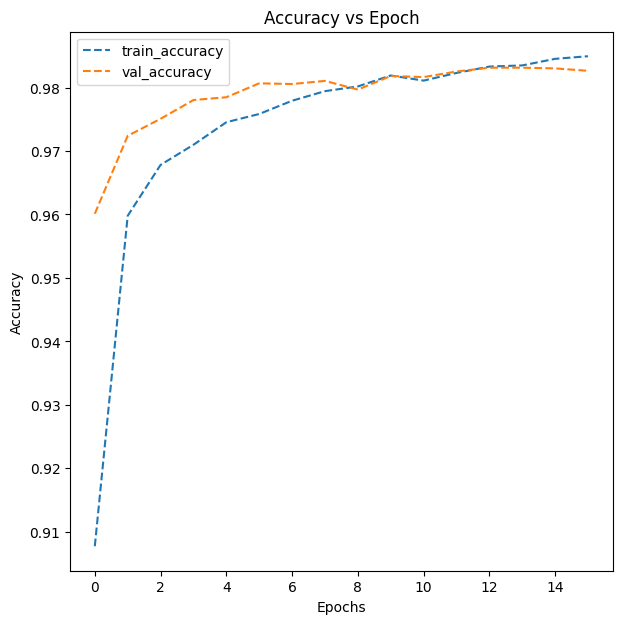

In [54]:
plot_accuracy(history.history)

# **Make Prediction**



In [55]:
df0_= pd.read_csv(f'{path}/Surveydata_test_(2).csv')
df1_= pd.read_csv(f'{path}/Traveldata_test_(2).csv')


df_p = pd.merge(df0_,df1_)
X, a, df_b = imputer(df_p, prediction = True)

In [56]:
a = list(df_scaled.columns)
b = list(df_b)
print(len(a), len(b))
print(set(a)-set(b))

112 112
set()


In [57]:
y = model.predict(X) 

1113/1113 [==============================] - 3s 3ms/step


In [58]:
yy = []
for n,p in y:
  if (p>n):
    yy.append(1)
  else:
    yy.append(0)

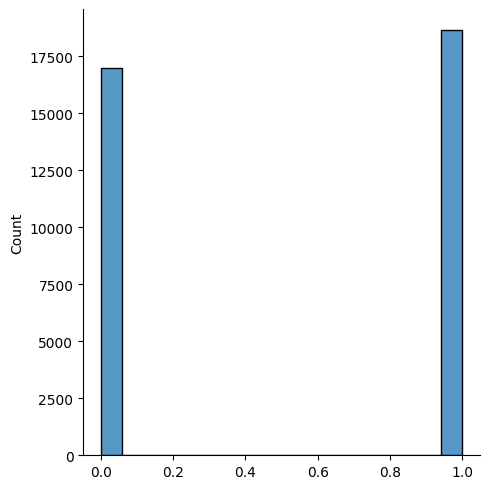

In [59]:
sns.displot(yy)

In [60]:
from datetime import datetime
rootname = 'mulligan_search'
filename = f'{path}/{rootname}_{datetime.now().strftime("%Y%m%d_%X")}.csv'

data = list(zip(df0_.ID.tolist(),yy))
gd = pd.DataFrame(data, columns=['ID', 'Overall_Experience'])
gd.to_csv(filename, index=False) 

# hot_mess_karen_20230422_19 25 50: 0.9518005
# hot_mess_earlyexit:0.9530363
# hotmess_now: 0.9512387
# rootname: 0.9520252
# hot_mess_karen.csv: 0.9526712
# squeaky_karen_96: 0.9507893
# squeaky_karen_96: 0.9513791
# karnen_96: 0.9493849
# rare_rabbit_95_5: 0.951969
# solid_fullytrained_95.csv: 0.9485703
##solid_97.csv:0.9511263, solid_96.csv:0.9495815, solid_95.csv: 0.9461828

# **Mulligan**

In [33]:
# we are being naughty now
df0_ = pd.read_csv(f'{path}/Surveydata_train_(2).csv')
df1_ = pd.read_csv(f'{path}/Traveldata_train_(2).csv')
df_p = pd.merge(df0_,df1_)
X, a, df_b = imputer(df_p, prediction = False) # Nice

In [34]:
y = model.predict(X) 

2950/2950 [==============================] - 9s 3ms/step


In [35]:
yy = []
for n,p in y:
  if (p>n):
    yy.append(1)
  else:
    yy.append(0)
data = list(zip(df0_.ID.tolist(),yy))
df_mulligan = pd.DataFrame(data, columns=['ID', 'Overall_Experience'])

In [36]:
df_mulligan['s0'] = df_mulligan.Overall_Experience
df_mulligan.drop(columns='Overall_Experience', inplace=True)

In [37]:
df_mulligan['s1'] = df0_.Overall_Experience

In [38]:
df_mulligan.loc[df_mulligan['s0'] == df_mulligan['s1'], 'Q'] = 'True' 
df_mulligan.loc[df_mulligan['s0'] != df_mulligan['s1'], 'Q'] = np.NaN 

In [39]:
df_mulligan.Q.isnull().sum()/len(df_mulligan)

0.03696796956950169

In [40]:
df_mulligan[df_mulligan.Q.isnull()].ID
IDs = df_mulligan[df_mulligan.Q.isnull()].ID
df_mull = df_mulligan[df_mulligan.ID.isin(IDs) == True]
df_mull.to_csv(f'{path}/mulligan_list.csv', index=False) 

In [41]:
# mulligan!
#df_mulligan = pd.read_csv(f'{path}/mulligan_list.csv')
#IDs = df_mulligan[df_mulligan.Q.isnull()].ID
#df = df[df.ID.isin(IDs) == False]

In [42]:
df_mull =  df_mulligan[df_mulligan.ID.isin(IDs) == True]
df_mull.Q.isnull().sum()/len(df_mull)

1.0

In [43]:
df_z = df_p[df_p.ID.isin(IDs) == True]
df_z

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
11,98800012,1,Good,Ordinary,Acceptable,Good,Needs Improvement,Acceptable,Good,Acceptable,...,Poor,Acceptable,Male,Loyal Customer,26.0,Personal Travel,Eco,1905,0.0,0.0
48,98800049,0,Good,Ordinary,Excellent,NaN,Very Convenient,Excellent,Excellent,Poor,...,Acceptable,Needs Improvement,Female,Loyal Customer,52.0,NaN,Eco,814,0.0,0.0
57,98800058,1,Good,Ordinary,NaN,Good,Inconvenient,Excellent,Good,Excellent,...,Acceptable,Excellent,Male,Loyal Customer,27.0,Personal Travel,Eco,2759,0.0,0.0
220,98800221,0,Good,Green Car,Good,Good,Needs Improvement,Acceptable,Good,Acceptable,...,Needs Improvement,Acceptable,Male,Loyal Customer,11.0,Business Travel,Eco,2719,0.0,1.0
222,98800223,1,Good,Green Car,Good,Good,Needs Improvement,Good,Good,Good,...,Needs Improvement,Good,Female,Disloyal Customer,24.0,Business Travel,Eco,1854,25.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94275,98894276,1,Good,Ordinary,Good,Excellent,Very Convenient,Good,Good,Good,...,Good,Good,Male,Loyal Customer,53.0,Business Travel,Eco,1660,0.0,0.0
94310,98894311,1,Good,Ordinary,Excellent,Excellent,Very Convenient,Good,Good,Good,...,Good,Good,Female,Disloyal Customer,45.0,Business Travel,Business,2548,1.0,0.0
94326,98894327,1,Good,Ordinary,Good,Good,Inconvenient,Excellent,Good,Excellent,...,Good,Good,Female,Loyal Customer,49.0,Personal Travel,Eco,270,0.0,0.0
94332,98894333,0,Good,Ordinary,Good,NaN,Convenient,Acceptable,Good,Acceptable,...,Excellent,Acceptable,Female,Disloyal Customer,22.0,Business Travel,Eco,2105,0.0,0.0


# **Appendix 0. Junk in the Trunk**

In [44]:
'''
ratio = (95-65)/100
print(ratio)
N= int(len(data) * ratio), len(data)

# now we flip out the first few 
mangled_data = []
for i, e in enumerate(data):
  if i < N:
    if e[1] == 1:
      mangled_data.append((e[0],0))
    else:
      mangled_data.append((e[0],1))
  mangled_data.append((e[0], e[1]))

md = pd.DataFrame(mangled_data, columns=['ID', 'Overall_Experience'])
md.to_csv(f'{path}/mangled_95_10680.csv', index=False)
''';

In [45]:
'''
inverted_data = []
for i, e in enumerate(data):
  if e[1] == 1:
    inverted_data.append((e[0],0))
  else:
    inverted_data.append((e[0],1))
id = pd.DataFrame(inverted_data, columns=['ID', 'Overall_Experience']) 
id.to_csv(f'{path}/inverted_95.csv', index=False) # 0.0538172
''';